# Выбор локации для скважины

Компании «ГлавРосГосНефть» необходимо принять решение - где бурить новую скважину.

**Цель исследования** — <u>предложить регион для разработки скважин и обосновать выбор.</u>

**Подцели:** 

- Построить модель ML, которая поможет определить регион, где добыча принесет наибольшую прибыль. 
- Проанализировать возможную прибыль и риски техникой *Bootstrap*.

**Ход исследования:**

В нашем распоряжении данные геологоразведки трёх регионов (пробы нефти): в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Так как предобработка данных уже проведена, исследование пройдёт в 6 этапов:
 1. Обзор данных.
 2. Подготовка данных.
 3. Обучение, проверка моделей и анализ результатов.
 4. Подготовка к расчету прибыли.
 5. Расчёт прибыли и рисков.
 6. Общий вывод.

## Загрузка и обзор данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
#pd.set_option('display.max_rows', None)

!pip install pandas-profiling
from pandas_profiling import ProfileReport

     |████████████████████████████████| 262 kB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 4.7 MB 17.2 MB/s eta 0:00:01
     |████████████████████████████████| 709 kB 81.0 MB/s eta 0:00:01
     |████████████████████████████████| 102 kB 10.9 MB/s ta 0:00:01
     |████████████████████████████████| 2.0 MB 40.8 MB/s eta 0:00:01
     |████████████████████████████████| 812 kB 54.0 MB/s eta 0:00:01
     |████████████████████████████████| 6.9 MB 79.6 MB/s eta 0:00:01
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27085 sha256=d036e9f348e5bb3211608d005aa8ca077f26e5005ed0b34b97d51a7a5739f0eb
  Stored in directory: /home/jovyan/.cache/pip/wheels/1d/05/04/c6d7d3b66539d9e659ac6dfe81e2d0fd4c1a8316cc5a403300
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295198 sha256=bc43f190d36545d37973ee5b8582fd31d63f56bfd6d2b1d9437172c3742c123f
  Stored in directory: /home/jovyan/.cache/pip/wheels/51/f9/a5/740af2fdb0ad1edf79aabdc41531

In [2]:
for df_num in range(3):
    globals()['df_%s' % str(df_num)] = pd.read_csv('/datasets/geo_data_' + str(df_num) +'.csv')
    print('df_' + str(df_num))
    display(globals()['df_%s' % str(df_num)].head(10))
    display(globals()['df_%s' % str(df_num)].info())
    display(globals()['df_%s' % str(df_num)].describe())
    print('Количество дубликатов:', globals()['df_%s' % str(df_num)].duplicated().sum())
    print('Количество уникальных id скважин:', globals()['df_%s' % str(df_num)]['id'].value_counts().sum())   
    print()

df_0


,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
5,wX4Hy,0.969570,0.489775,-0.735383,64.741541
6,tL6pL,0.645075,0.530656,1.780266,49.055285
7,BYPU6,-0.400648,0.808337,-5.624670,72.943292
8,j9Oui,0.643105,-0.551583,2.372141,113.356160
9,OLuZU,2.173381,0.563698,9.441852,127.910945


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


Количество дубликатов: 0
Количество уникальных id скважин: 100000

df_1


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
5,HHckp,-3.327590,-2.205276,3.003647,84.038886
6,h5Ujo,-11.142655,-10.133399,4.002382,110.992147
7,muH9x,4.234715,-0.001354,2.004588,53.906522
8,YiRkx,13.355129,-0.332068,4.998647,134.766305
9,jG6Gi,1.069227,-11.025667,4.997844,137.945408


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


Количество дубликатов: 0
Количество уникальных id скважин: 100000

df_2


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
5,LzZXx,-0.758092,0.710691,2.585887,90.222465
6,WBHRv,-0.574891,0.317727,1.773745,45.641478
7,XO8fn,-1.906649,-2.458350,-0.177097,72.480640
8,ybmQ5,1.776292,-0.279356,3.004156,106.616832
9,OilcN,-1.214452,-0.439314,5.922514,52.954532


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


Количество дубликатов: 0
Количество уникальных id скважин: 100000



**Признаки**
- `id` — уникальный идентификатор скважины;
- `f0`, `f1`, `f2` — три признака точек (нам неизвестно, что они означают, но сами признаки значимы).

**Целевой признак**
- `product` —  объем запасов в скважине (тыс. баррелей).

Посмотрим на распределение целевого признака `product` в трех регионах:

В регионе 1 было обнаружено 9250000.000000002 тыс. баррелей нефти
В регионе 2 было обнаружено 6882500.000000002 тыс. баррелей нефти
В регионе 3 было обнаружено 9500000.000000004 тыс. баррелей нефти


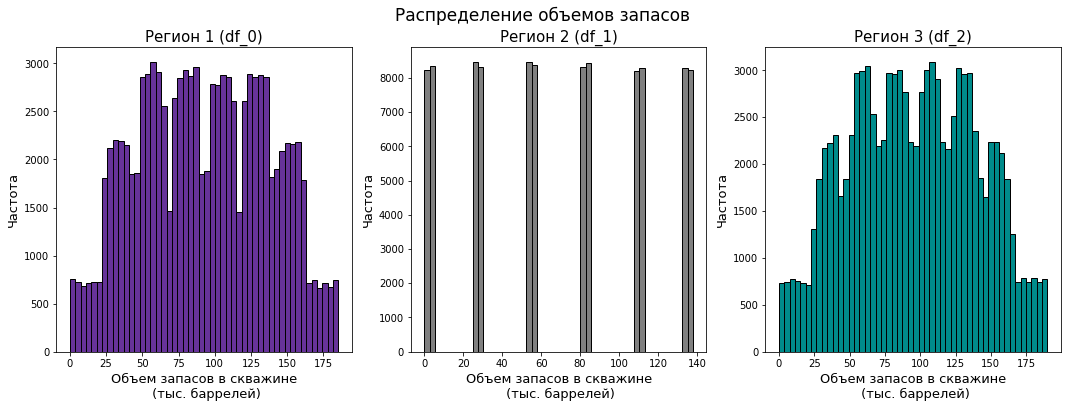

In [3]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5.6))
fig.suptitle ('Распределение объемов запасов', fontsize = 17)

#def hists()

for df_num, color in zip(range(3), ['rebeccapurple','grey', 'darkcyan']):
    
    total_product = globals()['df_%s' % str(df_num)]['product'].sum()
 
    ax = globals()['df_%s' % str(df_num)]['product'].plot(kind = 'hist', color = color, edgecolor ='black',
                                                     ax = axes[df_num], bins = 50)
    
    ax.set_xlabel('Объем запасов в скважине\n (тыс. баррелей)', fontsize = 13)
    ax.set_ylabel('Частота', fontsize = 13)
    ax.set_title (f'Регион {str(df_num + 1)} (df_{str(df_num)})', fontsize = 15)
    
    
    
    print(f'В регионе {str(df_num + 1)} было обнаружено {total_product} тыс. баррелей нефти')

### Вывод

**Данные:**

В каждом из датафреймов (`df_0`, `df_1`, `df_2`) лежит информация о 100 000 скважинах в определенном регионе. В каждом по 5 столбцов, 3 из которых (`f0`, `f1`, `f2`) - некие характеристики точек, а колонка `product` отражает объем запасов нефти в скважине. 

Столбцы `id` содержат уникальные идентификаторы скважин, которые не пригодятся для нашего дальнейшего исследования и обучения моделей. На дальнейшем этапе мы избавимся от них, и в нашем распоряжении останутся только количественные признаки, поэтому кодирование не потребуется. 

**Распределения целевого признака:**

Бросается в глаза различие распределений целевого признака (объема нефти): если в первом и третьем регионах распределения хотя бы отдаленно напоминают нормальное (если укажем, например, 10 корзин), то в случае 2ого региона - оно представляет из себя 12 "пиков", каждый из которых состоит из ~ 8300 скважин  с кол-вом нефти в пределах 140 тыс. баррелей. Мы помним, что в каждом датафрейме хранится информация о 100 000 скважин, в `df_0` и `df_2` разброс значений гораздо больше. Можно предположить, что данные георазведки во вовтором регионе либо собирались более поверхностно (например, с менее точным или неисправным оборудованием, или округлялись), либо дело в самой специфике региона, и скважины в нем - близкие родстенницы. ¯\_(ツ)_/¯

Пропусков и дубликатов нет, все id скважин уникальны - можем утверждать, что данных достаточно для проведения исследования. Приступим к их подготовке:
1. удалим ненужные столбцы `id`;
2. разобьем на выборки;
3. масштабируем.

In [4]:
ProfileReport(df_0)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Подготовка данных

Удалим стобцы `id`:

In [5]:
for df_num in range(3):
    globals()['df_%s' % str(df_num)] = globals()['df_%s' % str(df_num)].drop('id', axis = 1)
    display(globals()['df_%s' % str(df_num)].columns)

Index(['f0', 'f1', 'f2', 'product'], dtype='object')

Index(['f0', 'f1', 'f2', 'product'], dtype='object')

Index(['f0', 'f1', 'f2', 'product'], dtype='object')

### Разбиение данных на выборки

In [6]:
# разобъем исходные данные на  обучающую и валидационную выборки в соотношении 3:1
for df_num in range(3):
        globals()['train_%s' % str(df_num)],\
        globals()['valid_%s' % str(df_num)] = train_test_split(globals()['df_%s' % str(df_num)], 
                                                               test_size=0.25, random_state=12345)

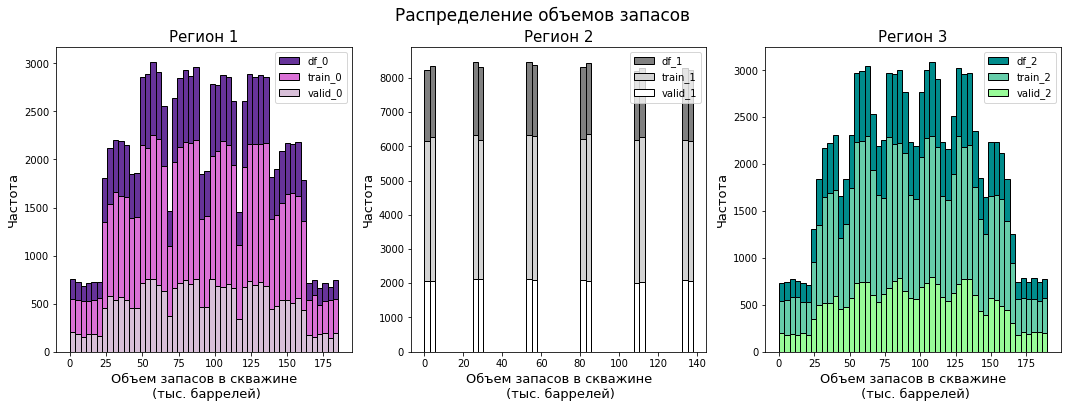

In [7]:
# посмотрим на распределения:
fig, axes = plt.subplots(1, 3, figsize=(18, 5.6))
fig.suptitle ('Распределение объемов запасов', fontsize = 17)        

color_sets = [['rebeccapurple', 'orchid', 'thistle'], ['grey', 'lightgray', 'w'], ['darkcyan', 'mediumaquamarine', 'palegreen']]

for df_num, color_set in zip(range(3), color_sets):        

        
        ax = globals()['df_%s' % str(df_num)]['product'].plot(kind = 'hist', edgecolor ='black',
                                                     ax = axes[df_num], bins = 50, color = color_set[0])
        globals()['train_%s' % str(df_num)]['product'].plot(kind = 'hist', edgecolor ='black',
                                                     ax = ax, bins = 50, color = color_set[1])
        globals()['valid_%s' % str(df_num)]['product'].plot(kind = 'hist', edgecolor ='black',
                                                     ax = ax, bins = 50, color = color_set[2])

        
        legend_list = [f'df_{df_num}',f'train_{df_num}',f'valid_{df_num}']
        ax.legend(legend_list)
        ax.set_xlabel('Объем запасов в скважине\n (тыс. баррелей)', fontsize = 13)
        ax.set_ylabel('Частота', fontsize = 13)
        ax.set_title (f'Регион {str(df_num + 1)}', fontsize = 15)

Распределения таргетов +- сохранились.

In [8]:
for df_num in ['0','1','2']:
    for selection in ['train', 'valid']: 
        globals()['features_%s' % selection + '_' + df_num] = globals()[selection + '_' + df_num].drop('product', axis=1)
        globals()['target_%s' % selection + '_' + df_num] = globals()[selection + '_' + df_num]['product']
      
        # выведем переменные с признаками:
        print(f'features_{selection}_{df_num}')
        display((globals()['features_%s' % selection + '_' + df_num]).sample(5))

        # и с целевыми признакми:
        print(f'target_{selection}_{df_num}')
        display((globals()['target_%s' % selection + '_' + df_num]).sample(5))

        # выведем доли выборок от исходных данных:
        print(f'Доля {selection}_{df_num} от df_{df_num} -', 
              int((len(globals()[selection+ '_' + df_num]) / len(globals()['df_'+ df_num]))*100), '%')
        print()

features_train_0


,f0,f1,f2
27139,0.275510,-0.221367,5.221112
53637,-0.786266,0.557193,6.823431
62543,0.839463,0.600080,-5.492258
52998,-0.556327,0.802105,7.927607
39995,0.029867,0.979268,8.365739


target_train_0


82615     42.182954
46082    126.311451
49658    160.526027
87171     34.214157
64373     63.186519
Name: product, dtype: float64

Доля train_0 от df_0 - 75 %

features_valid_0


,f0,f1,f2
28053,1.908707,-0.077351,1.921758
22026,1.489492,-0.417907,3.400969
12935,-0.914915,0.265215,-0.290326
76240,1.677590,-0.138942,7.859421
40073,1.218885,-0.627497,1.198236


target_valid_0


57592     60.826761
80493    114.551489
37291     79.211290
69028     57.314318
42820    127.519291
Name: product, dtype: float64

Доля valid_0 от df_0 - 25 %

features_train_1


,f0,f1,f2
32497,1.391030,-2.827290,4.998805
64870,9.899935,-1.304674,4.997465
74103,14.700292,-2.177264,-0.005845
80491,8.913610,2.837104,5.002182
44833,9.178466,-8.560370,0.991404


target_train_1


46760    110.992147
63433      3.179103
73141     80.859783
86884      3.179103
18033     80.859783
Name: product, dtype: float64

Доля train_1 от df_1 - 75 %

features_valid_1


,f0,f1,f2
34813,4.197683,-6.136481,3.993238
19972,-0.391408,-9.260238,4.999321
82520,-5.310759,-2.803557,5.001984
67104,4.417434,-3.327919,3.994316
48342,3.021959,3.609023,2.000087


target_valid_1


28117    134.766305
36232    110.992147
20685     80.859783
37984     57.085625
43339     26.953261
Name: product, dtype: float64

Доля valid_1 от df_1 - 25 %

features_train_2


,f0,f1,f2
69555,0.263185,3.110831,1.638655
3238,0.712514,2.392933,2.809818
17012,1.803710,1.128435,-2.816870
88644,-1.145325,-2.908632,2.469040
30094,0.054406,0.212906,6.583322


target_train_2


1942     151.717960
90638    165.188734
51190    167.982070
47967    157.966012
42011    121.258378
Name: product, dtype: float64

Доля train_2 от df_2 - 75 %

features_valid_2


,f0,f1,f2
36557,0.566538,-0.387054,3.294652
88653,2.271147,-1.629458,-0.693686
26647,-0.218655,-1.076717,5.570128
28100,0.357168,-0.410644,1.592485
54313,-0.796792,-3.492429,1.173694


target_valid_2


54961     51.907856
54884    115.627906
37073    189.602336
67365    114.109989
99309     64.138167
Name: product, dtype: float64

Доля valid_2 от df_2 - 25 %



### Масштабирование признаков

In [9]:
num_columns = df_0.columns.to_list()
num_columns.pop(-1)

for df_num in ['0','1','2']:
    scaler = StandardScaler()
    scaler.fit(globals()['features_train_%s' % df_num][num_columns]) 
    
    for selection in ['train', 'valid']: 
        globals()['features_%s' % selection + '_' + df_num][num_columns] = scaler.transform(globals()\
                                                                                 ['features_%s' % selection + '_' + df_num][num_columns])
        pd.options.mode.chained_assignment = None
        print(f'features_{selection}_{df_num}')
        display(globals()['features_%s' % selection + '_' + df_num].head(3))

features_train_0


,f0,f1,f2
27212,-0.544828,1.390264,-0.094959
7866,1.455912,-0.480422,1.209567
62041,0.260460,0.825069,-0.204865


features_valid_0


,f0,f1,f2
71751,0.517917,-0.610097,-0.126226
80493,0.568391,-0.086063,-0.814914
2655,0.805688,-1.613289,-1.341342


features_train_1


,f0,f1,f2
27212,-0.850855,0.624428,0.296943
7866,1.971935,1.832275,0.294333
62041,1.079305,0.170127,-0.296418


features_valid_1


,f0,f1,f2
71751,-0.168616,0.571372,0.297471
80493,0.878384,-1.772903,-0.293901
2655,-0.852976,-0.004986,-0.876502


features_train_2


,f0,f1,f2
27212,-0.526160,0.776329,-0.400793
7866,-0.889625,-0.404070,-1.222936
62041,-1.133984,0.208576,0.296765


features_valid_2


,f0,f1,f2
71751,-0.836717,-2.227439,-0.078489
80493,-0.821648,0.740237,-1.000811
2655,-2.651336,-0.235721,-0.244546


### Вывод

Мы:
1. Удалили столбцы, дублирующии индексы в исходных данных (`df_0`, `df_1`, `df_2`);
2. Разбили все датафреймы на 2 выборки: обучающую - 75% от исходных данных и валидационную - 25%, таки образом получили:
    - `train_0`
    - `valid_0`
    - `train_1`
    - `valid_1`
    - `train_2`
    - `valid_2`    
3. Поделили все выборки на признаки и целевые признаки и получили:
    - `features_train_0`
    - `target_train_0`
    - `features_valid_0`
    - `target_valid_0`
    - `features_train_1`
    - `target_train_1`
    - `features_valid_1`
    - `target_valid_1`
    - `features_train_2`
    - `target_train_2`
    - `features_valid_2`
    - `target_valid_2`
4. Стандартизировали данные.

## Обучение, проверка моделей и анализ результатов

Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые).

### Регион № 1

Регион № 1

Реальный средний запас сырья = 92.07859674082927
Предсказанный средний запас сырья = 92.59256778438035

Предсказанное больше реального на 0.51

RMSE на валидационной выборке: 37.5794217150813
MAPE на валидационной выборке: 1.1316999002228365



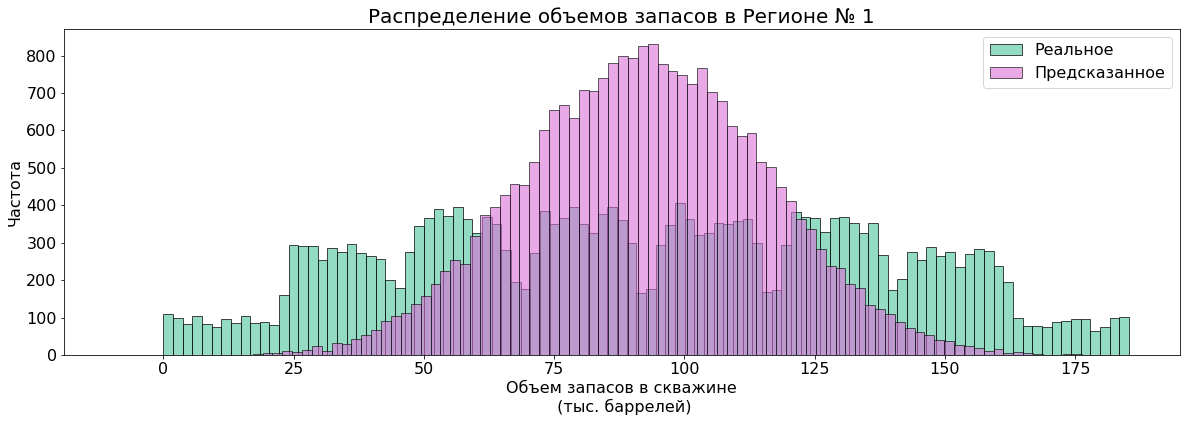

In [10]:
def model_metrics(features_train, target_train, features_valid, target_valid, df_num):
    
    # эксперимент с гиперпараметром лассо, который оказался безуспешным
    
    #best_rmse = np.inf # бесконечность
    #rmse_list = []
    #alpha_list = [.01, .1, 1, 5, 10, 20]
    
    #for alpha in alpha_list:
    
        #globals()['model_%s' % df_num] = Lasso(alpha=alpha)
        #globals()['model_%s' % df_num].fit(features_train, target_train)
        #globals()['predicted_valid_%s' % df_num] = pd.Series(globals()['model_%s' % df_num].predict(features_valid))
        
        
        #rmse = mean_squared_error(target_valid, globals()['predicted_valid_%s' % df_num])**0.5
        #rmse_list.append(rmse)
    
    #print(rmse_list)
    #plt.figure(figsize=(10,6))
    #plt.plot(np.log(alpha_list), rmse_list, marker ='*')
    #plt.ylim(37.5, 38)
    
    
    # обучаем модель на валидационной выборке
    globals()['model_%s' % df_num] = LinearRegression()
    globals()['model_%s' % df_num].fit(features_train, target_train)

    
    # cохраняем предсказания на валидационной выборке
    globals()['predicted_valid_%s' % df_num] = pd.Series(globals()['model_%s' % df_num].predict(features_valid), index = target_valid.index)
    
    
    print('\033[1m' + f'Регион № {int(df_num)+1}'+ '\033[0m')
    print()
    
    # сохраняем и выводим реальный и предсказанный средний запас сырья 
    globals()['target_mean_%s' % df_num] = target_valid.mean()
    globals()['predicted_target_mean_%s' % df_num] = globals()['predicted_valid_%s' % df_num].mean()
    
    print(f"Реальный средний запас сырья = {globals()['target_mean_%s' % df_num]}")
    print(f"Предсказанный средний запас сырья = {globals()['predicted_target_mean_%s' % df_num]}")
    print()
    
    if globals()['target_mean_%s' % df_num] > globals()['predicted_target_mean_%s' % df_num]:
        print('Реальное больше предсказанного на', 
              round(globals()['target_mean_%s' % df_num] - globals()['predicted_target_mean_%s' % df_num],2))
    else:
        print('Предсказанное больше реального на', 
              round(globals()['predicted_target_mean_%s' % df_num] - globals()['target_mean_%s' % df_num],2))
    
    print()
    
    # выводим метрики
    rmse = mean_squared_error(target_valid, globals()['predicted_valid_%s' % df_num])**0.5
        
    target_valid_mape = target_valid.loc[target_valid > .1]
    mape = mean_absolute_percentage_error(target_valid_mape, globals()['predicted_valid_%s' % df_num].loc[target_valid > .1])
    
    print('RMSE на валидационной выборке:', rmse)
    print('MAPE на валидационной выборке:', mape)
    
    print()
    
    
    # сравним рапсределения
    plt.figure(figsize=(20,6))
    
    ax = target_valid.plot(kind = 'hist', edgecolor ='black', bins = 100, color = 'mediumaquamarine',alpha = 0.7)
    globals()['predicted_valid_%s' % df_num].plot(ax=ax, kind = 'hist', edgecolor ='black', bins = 100, color = 'orchid',alpha = 0.6)

    legend_list = ['Реальное', 'Предсказанное']
    ax.legend(legend_list, fontsize = 16)
    ax.set_xlabel('Объем запасов в скважине\n (тыс. баррелей)', fontsize = 16)
    ax.set_ylabel('Частота', fontsize = 16)
    ax.set_title (f'Распределение объемов запасов в Регионе № {int(df_num) + 1}', fontsize = 20)
    plt.tick_params(labelsize = 16)
    
model_metrics(features_train_0, target_train_0, features_valid_0, target_valid_0, '0')

Корень из среднеквадратичной ошибки значительный - 37,6 тыс. баррелей и сами ошибки велики относительно фактических значений - в среднем 113%. Да и по распределению видно, что модель далеко не идеальна.

### Регион № 2

Регион № 2

Реальный средний запас сырья = 68.72313602435997
Предсказанный средний запас сырья = 68.728546895446

Предсказанное больше реального на 0.01

RMSE на валидационной выборке: 0.893099286775617
MAPE на валидационной выборке: 0.031375876531928124



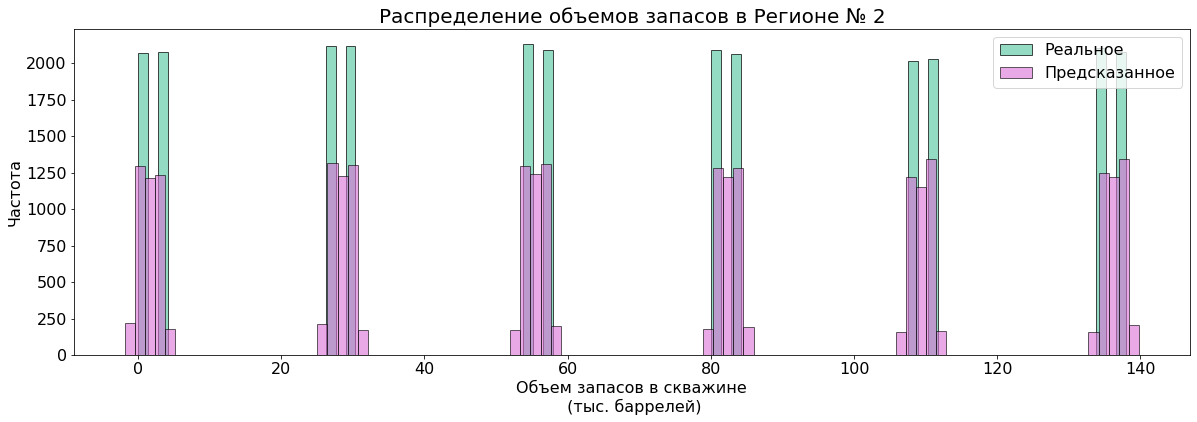

In [11]:
model_metrics(features_train_1, target_train_1, features_valid_1, target_valid_1, '1')

Модель второго региона справилах неплохо: в среднем ошибается на 893 баррелей, что составляет 3% от фактического значения.

### Регион № 3

Регион № 3

Реальный средний запас сырья = 94.88423280885438
Предсказанный средний запас сырья = 94.96504596800489

Предсказанное больше реального на 0.08

RMSE на валидационной выборке: 40.02970873393434
MAPE на валидационной выборке: 1.2940820943502962



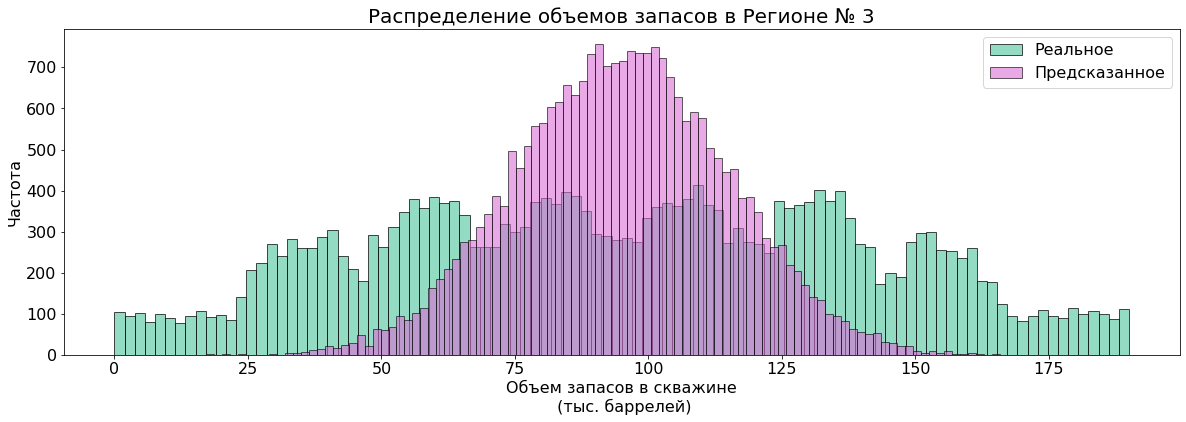

In [12]:
model_metrics(features_train_2, target_train_2, features_valid_2, target_valid_2, '2')

Модель для третего региона оказалась хуже всех: RMSE = 40 тыс. баррелей, что почти = 130% от среднего фактического значения.

### Вывод

Таким образом, лучше всех с задачей справилась модель для второго региона: в среднем ошибается на 893 баррелей, что составляет 3% от фактического значения. Корень из ее среднеквадратичной ошибки более, чем в 40 раз меньше следующей за ней по качеству модели для второго региона.

На втором месте модель для первого региона, но, по метрикам RMSE и MAPE, она не на много опережает модель для третьего региона.

## Подготовка к расчёту прибыли

- При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
- Бюджет на разработку скважин в регионе — 10 млрд рублей.
- При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
- После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.

In [13]:
# выборка из 500 скважин
wells = 500 

# выборка из 200 лучших скважин
best_wells = 200 

# доход с каждой единицы продукта (1 тыс. баррелей)
thousand_barrel_price = 450_000

# Бюджет на разработку скважин в регионе
budget = 10_000_000_000 

3.2. Рассчитайте достаточный объём сырья для безубыточной разработки новой скважины. Сравните полученный объём сырья со средним запасом в каждом регионе.

In [14]:
enough_product = budget / thousand_barrel_price
print(f'Достаточный объем сырья для безубыточной разработки новой скважины = {int(enough_product)} тыс. баррелей.')

Достаточный объем сырья для безубыточной разработки новой скважины = 22222 тыс. баррелей.


22 тыс. баррелей надо добыть, чтобы выйти в 0.

In [15]:
enough_product_per_well = enough_product / 200
print(f'Достаточный объем сырья для скважины = {int(enough_product_per_well)} тыс. баррелей.')

Достаточный объем сырья для скважины = 111 тыс. баррелей.


Сравним со средним объемом продукта по регионам:

In [16]:
for num, mean in zip([1,2,3],[target_mean_0 , target_mean_1, target_mean_2]):
    print(f'Средний запас нефти в регионе №{num} = {int(mean)} тыс. баррелей')
    print()

Средний запас нефти в регионе №1 = 92 тыс. баррелей

Средний запас нефти в регионе №2 = 68 тыс. баррелей

Средний запас нефти в регионе №3 = 94 тыс. баррелей



Выбирать скважины наугад - очень опасно для «ГлавРосГосНефти» в любом регионе, а особенно во втором, так как средний запас нефти в скважинах меньше минимального допустимого для того, чтобы окупить бюджет.

Напишем функцию для расчета прибыли по выбранным скважинам и предсказаниям модели:

- выберем скважины с максимальными значениями предсказаний;

- просуммируем целевое значение объема сырья, соответствующее этим предсказаниям;

- рассчитаем прибыль для полученного объема сырья.

Сколько получим прибыли, если по модели выберем 200 самых прибыльных скважин


In [17]:
def revenue(random_500, target_500):
    
    
    #random_500_index = np.random.choice(globals()['predicted_valid_%s' % df_num].index, size = wells, replace = True)
    #random_500 = globals()['predicted_valid_%s' % df_num].loc[random_500_index]
    
    # строка №1
    best_200 = random_500.sort_values(ascending = False).iloc[:200]
    
    # строка №2
    revenue = target_500.loc[best_200.index].sum() * thousand_barrel_price - budget
    
    return revenue

In [18]:
random_500_0 = predicted_valid_0.sample(500, replace=True, random_state=12345)
target_500_0 = target_valid_0.loc[random_500_0.index]


# 200 из предсказанных:
best_200_0 = random_500_0.sort_values(ascending = False).iloc[:200]

# 200 из таргета:
best_200_0_out_of_target_500 = target_500_0.loc[best_200_0.index].iloc[:200]

display(best_200_0, best_200_0_out_of_target_500)

20459    154.291513
77429    153.944832
23465    150.995046
23465    150.995046
52135    150.425978
            ...    
93742    100.403911
70347    100.255757
42697    100.230345
91733    100.186304
79940    100.052041
Length: 200, dtype: float64

20459    120.520215
77429    158.249430
23465     91.010341
23465     91.010341
23465     91.010341
            ...    
51686     51.703849
54852     50.727235
77721     48.330546
77610     56.425972
30351     56.866494
Name: product, Length: 200, dtype: float64

### Вывод


На данном этапе, проведя расчеты, мы выяснили:
1. Чтобы окупить бюджет и выйти в 0  «ГлавРосГосНефти» нужно добыть 22222 тыс. баррелей.
2. Для этого в каждой из 200 лучших выбранных скважин должно быть 111 тыс. баррелей.
3. Среднии запас нефти в средней скважине в 1ом, 2ом и третьем регионах меньше этого значения на 19, 48 и 17 тыс. баррелей соответственно.

Также мы написали функцию `revenue`, которая принимает 500 рандомных скажин - `random_500`, выбирает из них 200 лучших и считает бюджет, которые они принесут. Также функция принимает фактические значения запасов в этих скважинах `target_500`.

На следующем этапе мы применим эту функцию в бутстрепе из 1000 выборок и узнаем, насколько надежными окажутся наши модели для выбранных регионов.

## Расчёт прибыли и рисков 

Посчитаем риски и прибыль для каждого региона:

In [19]:
state = np.random.RandomState(12345)

for df_num in ['0', '1', '2']:
    values = []
    for i in range(1000):
        
        random_500 = globals()['predicted_valid_%s' % df_num].sample(500, replace=True, random_state=state)
        values.append(revenue(random_500, globals()['target_valid_%s' % df_num].loc[random_500.index]))
        
    values = pd.Series(values)
        
    print(f'Средняя прибыль для регионна №{int(df_num)+1} = {int(values.mean())} руб.')
    print()
    print(f'2,5%-квантиль = {int(values.quantile(0.025))} руб.\n97,5%-квантиль = {int(values.quantile(0.975))} руб.')
    print()
    
    
    #print('Вероятность убытка',len(values.loc[values < 0]) / len(values)*100, '%') 
    print('Вероятность убытка',(values < 0).mean()*100, '%') 
   
    print()
    if df_num == '2':
        break
    print('_____________________')


Средняя прибыль для регионна №1 = 600735244 руб.

2,5%-квантиль = 12948331 руб.
97,5%-квантиль = 1231163605 руб.

Вероятность убытка 2.0 %

_____________________
Средняя прибыль для регионна №2 = 663958995 руб.

2,5%-квантиль = 206476361 руб.
97,5%-квантиль = 1191197684 руб.

Вероятность убытка 0.1 %

_____________________
Средняя прибыль для регионна №3 = 597381047 руб.

2,5%-квантиль = 1734929 руб.
97,5%-квантиль = 1246217960 руб.

Вероятность убытка 2.5 %



### Вывод

Несмотря на то, что у второго региона самый низкий 97,5%-квантиль, средняя прибыль, которую он может принести - 663 958 995 руб. Также, выбирая 2ой регион, самая низкая вероятность понести убытки - всего десятая процента. На втором месте первый регион, 3ий, хоть и незначительно отличается от первого - "самый опасный": средняя прибыль, которую он может принести - почти на 67 млн. руб меньше, чем во втором регионе - лидере, а риск убытка в 25 раз больше!

## Общий вывод

**Мы:**
1. Изучили данные о 100 000 скважинах в каждом из 3х регионов;
2. Подготовили их для обучения моделей (удалили ненужный столбец `id`, разбили на обучающую и валидационную выборки 3:1, масштабировали признаки);
3. Построили 3 модели линейной регресси для каждого региона (лучше всех справилась модель для второго региона - `model_1`: в среднем ошибается на 893 баррелей, что составляет 3% от фактического значения.)
4. Провели расчеты и выяснили:
    - чтобы окупить бюджет и выйти в 0 «ГлавРосГосНефти» нужно добыть 22222 тыс. баррелей;
    - для этого в каждой из 200 лучших выбранных скважин должно быть 111 тыс. баррелей;
    - среднии запас нефти в средней скважине в 1ом, 2ом и третьем регионах меньше этого значения на 19, 48 и 17 тыс. баррелей соответственно.
5. Написали функцию revenue, которая принимает 500 рандомных скажин - random_500, выбирает из них 200 лучших и считает бюджет, которые они принесут. Также функция принимает фактические значения запасов в этих скважинах target_500.
6. Проанализировали возможную прибыль и риски техникой Bootstrap для каждого региона.


Проведя наше исследование, **настоятельно рекомендуем «ГлавРосГосНефти» разрабатывать скважины во втором регионе с использованием нашей модели `model_1` ("1" - это номер изначального датафремй, где лежит инфа по второму региону), что с вероятность 99% принесет прибыль компании в пределах 206 476 361 - 1 191 197 684 руб., с вероятностью уйти в убыток 0,1%. Данный регион явлвяется не только самым прибыльным, но и самым безопасным из трех предложенных локаций.**

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Выполнен шаг 1: данные подготовлены
- [ ]  Выполнен шаг 2: модели обучены и проверены
    - [ ]  Данные корректно разбиты на обучающую и валидационную выборки
    - [ ]  Модели обучены, предсказания сделаны
    - [ ]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [ ]  На экране напечатаны результаты
    - [ ]  Сделаны выводы
- [ ]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [ ]  Для всех ключевых значений созданы константы Python
    - [ ]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [ ]  По предыдущему пункту сделаны выводы
    - [ ]  Написана функция расчёта прибыли
- [ ]  Выполнен шаг 4: посчитаны риски и прибыль
    - [ ]  Проведена процедура *Bootstrap*
    - [ ]  Все параметры бутстрепа соответствуют условию
    - [ ]  Найдены все нужные величины
    - [ ]  Предложен регион для разработки месторождения
    - [ ]  Выбор региона обоснован